# Web scraping with Pandas read_html()

Python's libraries such as Beautiful Soup, Selenium, etc. can be used for webpage scraping. In this article, we will be using `pandas.read_html()` to scrape the list of final candidates that are qualified to attend [Data Science Nigeria (DSN)](https://www.datasciencenigeria.org/) all expense paid boot camp 2019. Information about **Staff Promotion Algorithm** challenge can be found on [Kaggle](https://www.kaggle.com/c/intercampusai2019).


### Import libraries

In [2]:
import pandas as pd
import numpy as np

We want to scrape 2019 ARTIFICIAL INTELLIGENCE BOOTCAMP – FINAL CANDIDATES table on [DSN website](https://www.datasciencenigeria.org/2019candidates)

In [3]:
url = "https://www.datasciencenigeria.org/2019candidates"

In [4]:
table = pd.read_html(url, header= 0)

`pd.read_html()` reads HTML tables into a **list** of **DataFrame** objects.

In [5]:
type(table)

list

As you can see the table is a list of dataframe object. Let's see what variable table is holding.

In [6]:
print(table)

[     S/N                      Full Name DSN Registration No  \
0      1            Yakubu Jafar Ahmadu   DSN/AIB/2019/R001   
1      2                  Kazeem Hakeem   DSN/AIB/2019/R002   
2      3            Oshingbesan Adebayo   DSN/AIB/2019/R003   
3      4                Ibrahim Olagoke   DSN/AIB/2019/R004   
4      5                   Sarah Adigwe   DSN/AIB/2019/R006   
5      6                  Onuoha Obinna   DSN/AIB/2019/R007   
6      7            Uwem Akan Nkereuwem   DSN/AIB/2019/R008   
7      8       Nwaobasi Ifeanyi Anthony   DSN/AIB/2019/R009   
8      9                         Dunsin   DSN/AIB/2019/R010   
9     10     Demehin Ibukunoluwa George   DSN/AIB/2019/R011   
10    11            Raheem Ridwan Lekan   DSN/AIB/2019/R012   
11    12      Abdullahi Adinoyi Ibrahim   DSN/AIB/2019/R013   
12    13     Muhammed Mujitaba Muhammed   DSN/AIB/2019/R015   
13    14                 Edward Olayemi   DSN/AIB/2019/R016   
14    15     Oyelami Favour Fiyinfoluwa   DSN/AIB/2019

If the web page has many tables, `pd.read_html()` return all the tables. Let's check the number of tables that `pd.read_html()` return in the DSN web page.

In [7]:
len(table)

1

Good! It returns only one table. Remember DSN web page has only one table. We need to convert this `list of Dataframe` to `Pandas DataFrame`.

In [8]:
data = pd.DataFrame(table[0]) 
data.head()

,S/N,Full Name,DSN Registration No,School/Workplace
0,1,Yakubu Jafar Ahmadu,DSN/AIB/2019/R001,"Ahmadu Bello University, Zaria"
1,2,Kazeem Hakeem,DSN/AIB/2019/R002,Crown Interactive
2,3,Oshingbesan Adebayo,DSN/AIB/2019/R003,NaN
3,4,Ibrahim Olagoke,DSN/AIB/2019/R004,Tissec
4,5,Sarah Adigwe,DSN/AIB/2019/R006,"Ladoke Akintola University Of Technology, Ogbo..."


In [9]:
data.shape

(228, 4)

This means that DSN only selected 228 candidates that will attend 2019 ARTIFICIAL INTELLIGENCE BOOTCAMP!

### List of institutions well represented in the DSN boot camp

In [11]:
data["School/Workplace"].value_counts().to_frame()

,School/Workplace
University Of Lagos,28
"Obafemi Awolowo University, Ile-Ife",22
"Ladoke Akintola University Of Technology, Ogbomoso",16
"Ambrose Alli University, Ekpoma",15
University Of Ibadan,14
University Of Benin,6
"Federal University Of Technology, Akure",5
"Federal University Of Agriculture, Abeokuta",4
"Federal University Of Technology, Minna",4
Nigeria Police Academy Wudil,4


### List of top ten institutions well represented in the DSN boot camp

We shall use matplotlib to visualize the top 10 institutions that are well represented in the DSN boot camp. Matplotlib is a statistical plotting library in python. It has beautiful default styles.

In [21]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [12]:
top_10 = data["School/Workplace"].value_counts().to_frame().\
nlargest(10, "School/Workplace")

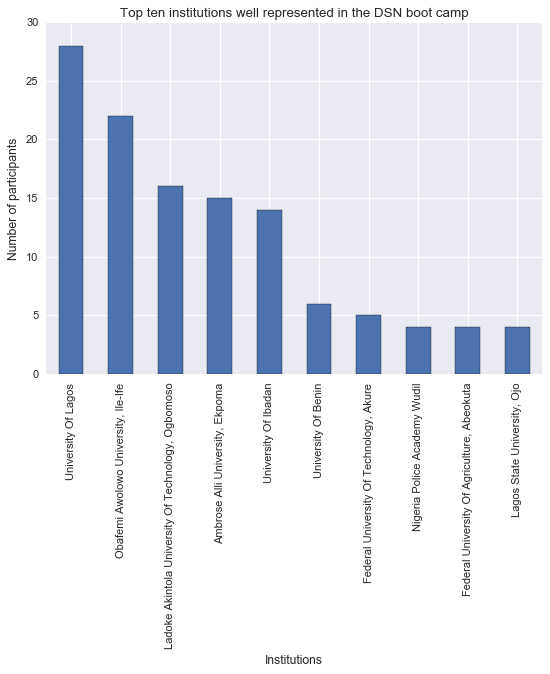

In [22]:
top_10.plot(kind = "bar")
plt.legend("")
plt.ylabel("Number of participants")
plt.xlabel("Institutions")
plt.title("Top ten institutions well represented in the DSN boot camp");

It can be seen from the bar chart that University of Lagos has the highest representative with 28 (13.08%) participants on the list.